## Preprocessing

In [1]:
  # Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algorithms
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Neural networks
import tensorflow as tf

In [17]:
#  Import and read the charity_data.csv.
import pandas as pd
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [18]:
# review our data for any cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [19]:
# Review if scaling will be needed
df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [20]:
# Drop the non-beneficial ID columns, 'EIN'.
df = df.drop(columns= ['EIN'])

In [6]:
 # Determine the number of unique values in each column.
 cat_cols = df.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(col)
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

NAME
19568
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

APPLICATION_TYPE
17
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7 

In [7]:
# Look at NAME value counts for binning
df.NAME.value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [21]:
df_name = df.NAME.value_counts()
list(df_name.loc[df_name < 400].index)

['PTA TEXAS CONGRESS',
 'SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC',
 'ALPHA PHI SIGMA',
 'TOASTMASTERS INTERNATIONAL',
 'MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS',
 'LITTLE LEAGUE BASEBALL INC',
 'INTERNATIONAL ASSOCIATION OF LIONS CLUBS',
 'MOMS CLUB',
 'INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION',
 'AMERICAN ASSOCIATION OF UNIVERSITY WOMEN',
 'FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA',
 'KNIGHTS OF COLUMBUS',
 'HABITAT FOR HUMANITY INTERNATIONAL INC',
 'TENNESSEE ORDER OF THE EASTERN STAR',
 'VETERANS OF FOREIGN WARS OF THE UNITED STATES AUXILIARY',
 'PTA UTAH CONGRESS',
 'THE UNITED STATES PONY CLUBS INC',
 'CIVITAN INTERNATIONAL',
 'SIGMA BETA DELTA INC',
 'HONOR SOCIETY OF PHI KAPPA PHI',
 'MONTANA 4-H FOUNDATION INC',
 'WASHINGTON STATE GRANGE',
 'UNIVERSITY OF WYOMING',
 'DEMOLAY INTERNATIONAL',
 'SERTOMA INC',
 'AIR FORCE ASSOCIATION',
 'WORKERS UNITED',
 'GAMMA THETA UPSILON',
 'INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS',
 'SO

In [22]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
df_name = df.NAME.value_counts()
name_to_replace= list(df_name.loc[df_name < 400].index)

# Replace in dataframe
for name in name_to_replace:
    df['NAME'] = df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
df['NAME'].value_counts()

Other                                              30674
PARENT BOOSTER USA INC                              1260
TOPS CLUB INC                                        765
UNITED STATES BOWLING CONGRESS INC                   700
WASHINGTON STATE UNIVERSITY                          492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC      408
Name: NAME, dtype: int64

In [23]:
# Look at NAME value counts for binning
df.NAME.value_counts()

Other                                              30674
PARENT BOOSTER USA INC                              1260
TOPS CLUB INC                                        765
UNITED STATES BOWLING CONGRESS INC                   700
WASHINGTON STATE UNIVERSITY                          492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC      408
Name: NAME, dtype: int64

In [25]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df.CLASSIFICATION.value_counts().loc[df.CLASSIFICATION.value_counts() > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [26]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
df_class = df.CLASSIFICATION.value_counts()
classifications_to_replace = list(df_class.loc[df_class < 200].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [27]:
# Convert categorical data to numeric with `pd.get_dummies`
dfp = pd.get_dummies(df)
dfp.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_WASHINGTON STATE UNIVERSITY,APPLICATION_TYPE_T10,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
# features dont appear to correlate well
corrs = dfp.corr()
corrs["IS_SUCCESSFUL"].sort_values(ascending=False)

IS_SUCCESSFUL                                           1.000000
AFFILIATION_Independent                                 0.368322
NAME_Other                                              0.286044
ORGANIZATION_Trust                                      0.162164
CLASSIFICATION_C7000                                    0.110084
APPLICATION_TYPE_T5                                     0.088575
APPLICATION_TYPE_T10                                    0.086805
APPLICATION_TYPE_T6                                     0.079817
INCOME_AMT_1-9999                                       0.067058
CLASSIFICATION_C1000                                    0.062589
CLASSIFICATION_Other                                    0.054672
ORGANIZATION_Co-operative                               0.053520
INCOME_AMT_10000-24999                                  0.036937
APPLICATION_TYPE_T13                                    0.034482
INCOME_AMT_100000-499999                                0.030542
INCOME_AMT_25000-99999   

In [29]:
# Split our preprocessed data into our features and target arrays
X = dfp.drop(columns=["IS_SUCCESSFUL"])
y = dfp["IS_SUCCESSFUL"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Split the preprocessed data into a training and testing dataset


(25724, 59) (25724,)
(8575, 59) (8575,)


In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

TRAINING SET METRICS
[[ 8160  3868]
 [ 3211 10485]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     12028
           1       0.73      0.77      0.75     13696

    accuracy                           0.72     25724
   macro avg       0.72      0.72      0.72     25724
weighted avg       0.72      0.72      0.72     25724


TESTING SET METRICS
[[2659 1351]
 [1085 3480]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.69      4010
           1       0.72      0.76      0.74      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.71      0.71      8575
weighted avg       0.72      0.72      0.72      8575



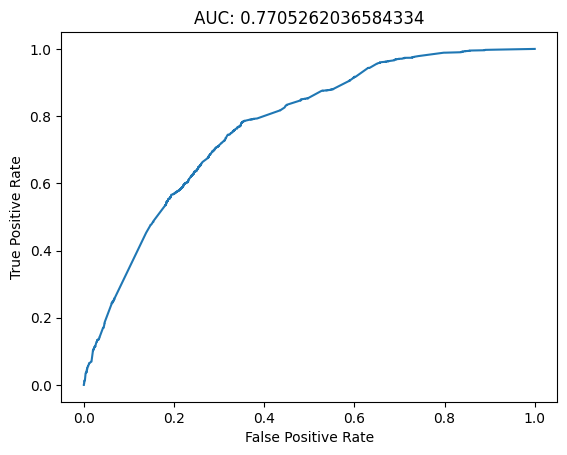

In [32]:
 # init the model
lr = LogisticRegression()
doMLClassification(lr, X_train_scaled, y_train, X_test_scaled, y_test)

TRAINING SET METRICS
[[ 9605  2423]
 [ 2245 11451]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80     12028
           1       0.83      0.84      0.83     13696

    accuracy                           0.82     25724
   macro avg       0.82      0.82      0.82     25724
weighted avg       0.82      0.82      0.82     25724


TESTING SET METRICS
[[2708 1302]
 [1195 3370]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      4010
           1       0.72      0.74      0.73      4565

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575



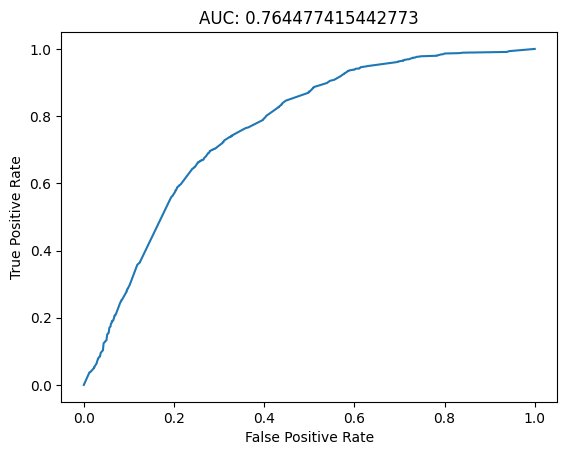

In [33]:
# Random forest slightly overfits and not as good as the LR
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train_scaled, y_train, X_test_scaled, y_test)

TRAINING SET METRICS
[[ 8422  3606]
 [ 2616 11080]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     12028
           1       0.75      0.81      0.78     13696

    accuracy                           0.76     25724
   macro avg       0.76      0.75      0.76     25724
weighted avg       0.76      0.76      0.76     25724


TESTING SET METRICS
[[2634 1376]
 [1025 3540]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      4010
           1       0.72      0.78      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575



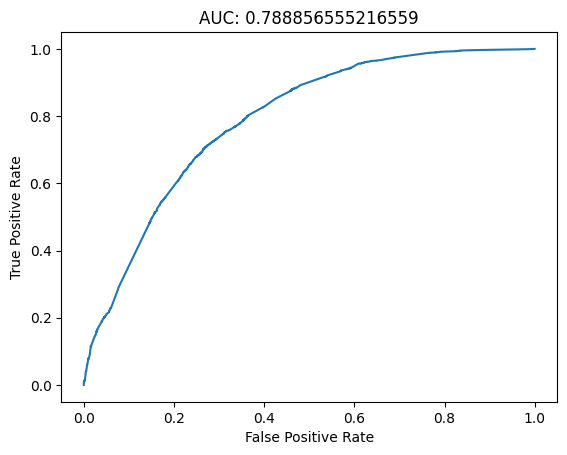

In [34]:
#LGBM Best AUC ,
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

## Compile, Train and Evaluate the Model

In [35]:
# Define the 2nd model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                720       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train,epochs=150)

Epoch 1/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5392 - accuracy: 0.7338
Epoch 2/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5384 - accuracy: 0.7344
Epoch 3/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.7341
Epoch 4/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5373 - accuracy: 0.7341
Epoch 5/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5368 - accuracy: 0.7348
Epoch 6/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 0.7345
Epoch 7/150
804/804 [==============================] - 2s 3ms/step - loss: 0.5359 - accuracy: 0.7342
Epoch 8/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5354 - accuracy: 0.7338
Epoch 9/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5348 - accuracy: 0.7350
Epoch 10/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5350 - accura

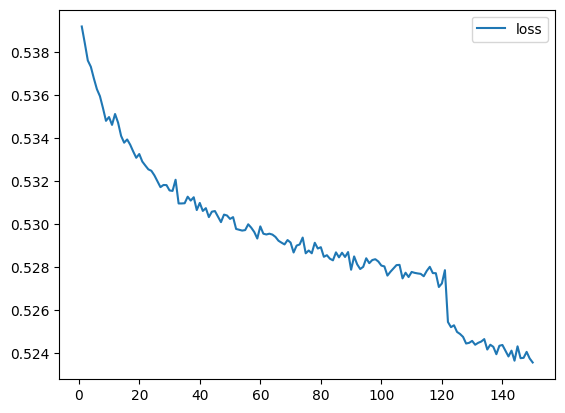

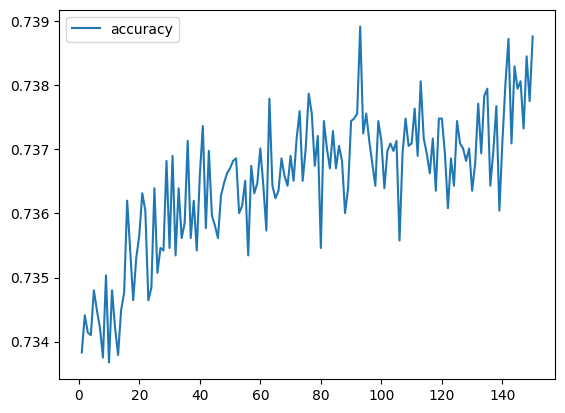

In [39]:
 # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

print()

 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5474 - accuracy: 0.7224 - 539ms/epoch - 2ms/step
Loss: 0.5473874807357788, Accuracy: 0.722449004650116


268/268 [==============================] - 0s 1ms/step
TRAINING SET METRICS
[[ 7985  4043]
 [ 2666 11030]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70     12028
           1       0.73      0.81      0.77     13696

    accuracy                           0.74     25724
   macro avg       0.74      0.73      0.74     25724
weighted avg       0.74      0.74      0.74     25724


TESTING SET METRICS
[[2576 1434]
 [ 946 3619]]
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      4010
           1       0.72      0.79      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575



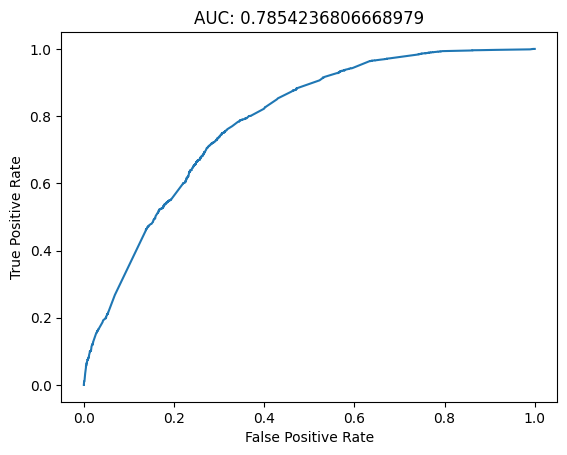

In [41]:
# predict the model
train_preds = [round(x[0]) for x in nn.predict(X_train_scaled)]
test_preds = [round(x[0]) for x in nn.predict(X_test_scaled)]
test_proba = [x[0] for x in nn.predict(X_test_scaled)]

# make some pretty graphs
print("TRAINING SET METRICS")
print(confusion_matrix(y_train, train_preds))
print(classification_report(y_train, train_preds))
print()
print("TESTING SET METRICS")
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

# ROC Curve
auc = roc_auc_score(y_test, test_proba)
fpr, tpr, thresholds = roc_curve(y_test, test_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(F"AUC: {auc}")
plt.show()

In [42]:
# Export our model to HDF5 file
nn.save('nn_secound_run.h5')

In [49]:
# Define the 3rd model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 3


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                600       
                                                                 
 dense_9 (Dense)             (None, 6)                 66        
                                                                 
 dense_10 (Dense)            (None, 3)                 21        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6101 - accuracy: 0.7019
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5631 - accuracy: 0.7234
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5532 - accuracy: 0.7248
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7276
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5472 - accuracy: 0.7283
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.7290
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5432 - accuracy: 0.7303
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5407 - accuracy: 0.7318
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5398 - accuracy: 0.7321
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5387 - accura

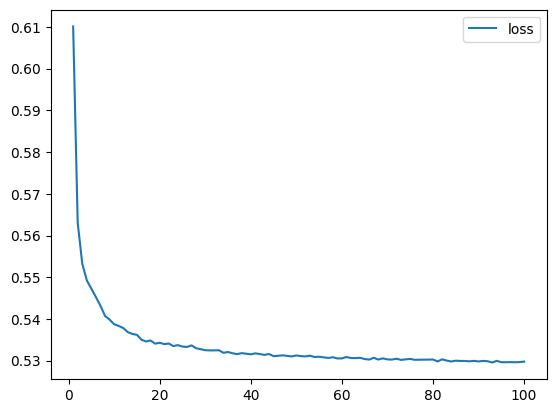

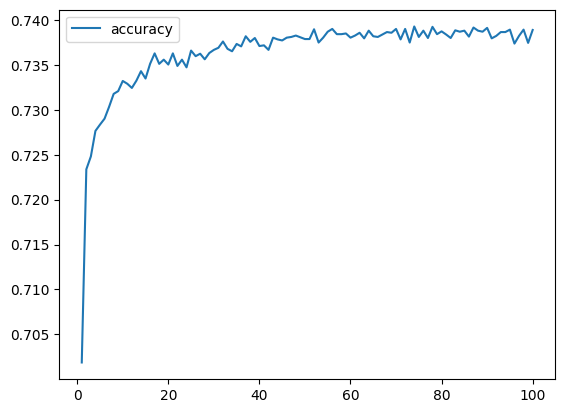

In [52]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

print()

 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5492 - accuracy: 0.7255 - 469ms/epoch - 2ms/step
Loss: 0.5491697788238525, Accuracy: 0.7254810333251953


268/268 [==============================] - 1s 2ms/step
TRAINING SET METRICS
[[ 7974  4054]
 [ 2627 11069]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70     12028
           1       0.73      0.81      0.77     13696

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724


TESTING SET METRICS
[[2576 1434]
 [ 920 3645]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      4010
           1       0.72      0.80      0.76      4565

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.72      8575



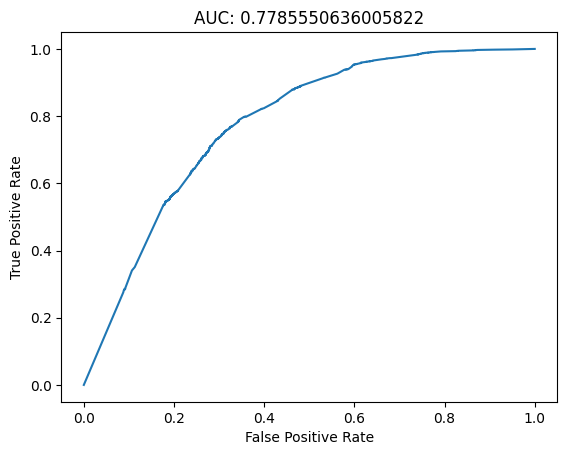

In [54]:
# predict the model
train_preds = [round(x[0]) for x in nn.predict(X_train_scaled)]
test_preds = [round(x[0]) for x in nn.predict(X_test_scaled)]
test_proba = [x[0] for x in nn.predict(X_test_scaled)]

# make some pretty graphs
print("TRAINING SET METRICS")
print(confusion_matrix(y_train, train_preds))
print(classification_report(y_train, train_preds))
print()
print("TESTING SET METRICS")
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

# ROC Curve
auc = roc_auc_score(y_test, test_proba)
fpr, tpr, thresholds = roc_curve(y_test, test_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(F"AUC: {auc}")
plt.show()

In [55]:
# Export our model to HDF5 file
nn.save('nn_third_run.h5')

In [73]:
# Define the 4th model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4
hidden_nodes_layer4 = 2


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 8)                 480       
                                                                 
 dense_23 (Dense)            (None, 6)                 54        
                                                                 
 dense_24 (Dense)            (None, 4)                 28        
                                                                 
 dense_25 (Dense)            (None, 2)                 10        
                                                                 
 dense_26 (Dense)            (None, 1)                 3         
                                                                 
Total params: 575
Trainable params: 575
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [75]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 4s 3ms/step - loss: 0.6358 - accuracy: 0.6653
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5680 - accuracy: 0.7196
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.7259
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7290
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5453 - accuracy: 0.7290
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5441 - accuracy: 0.7308
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5426 - accuracy: 0.7315
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5417 - accuracy: 0.7303
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5413 - accuracy: 0.7319
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5400 - accuracy: 0.7320

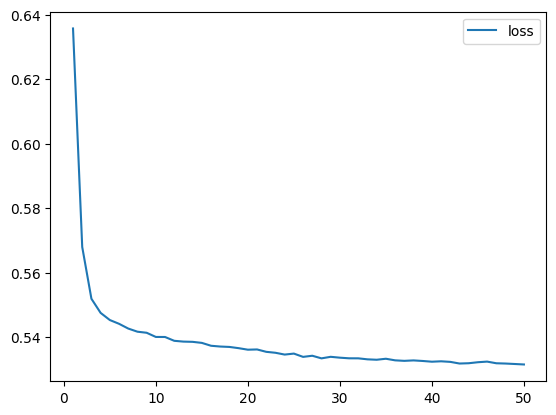

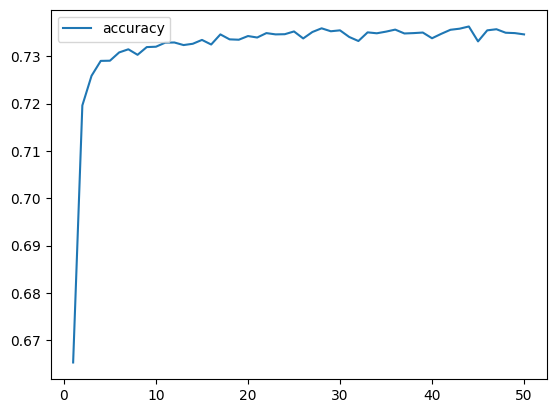

In [76]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

print()

 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5468 - accuracy: 0.7228 - 735ms/epoch - 3ms/step
Loss: 0.5467779636383057, Accuracy: 0.7227988243103027


268/268 [==============================] - 0s 1ms/step
TRAINING SET METRICS
[[ 7953  4075]
 [ 2667 11029]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70     12028
           1       0.73      0.81      0.77     13696

    accuracy                           0.74     25724
   macro avg       0.74      0.73      0.73     25724
weighted avg       0.74      0.74      0.74     25724


TESTING SET METRICS
[[2570 1440]
 [ 937 3628]]
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      4010
           1       0.72      0.79      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575



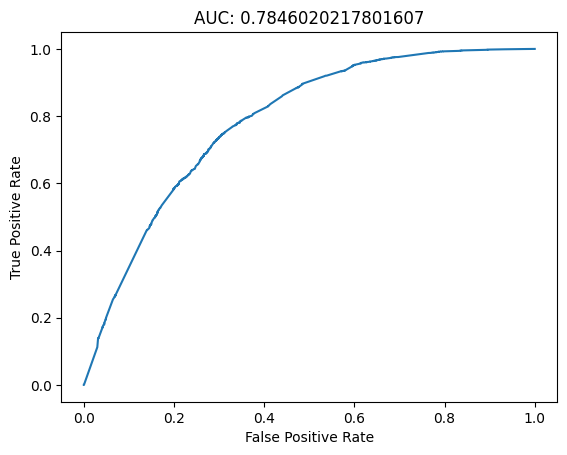

In [78]:
# predict the model
train_preds = [round(x[0]) for x in nn.predict(X_train_scaled)]
test_preds = [round(x[0]) for x in nn.predict(X_test_scaled)]
test_proba = [x[0] for x in nn.predict(X_test_scaled)]

# make some pretty graphs
print("TRAINING SET METRICS")
print(confusion_matrix(y_train, train_preds))
print(classification_report(y_train, train_preds))
print()
print("TESTING SET METRICS")
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

# ROC Curve
auc = roc_auc_score(y_test, test_proba)
fpr, tpr, thresholds = roc_curve(y_test, test_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(F"AUC: {auc}")
plt.show()

In [79]:
# Export our model to HDF5 file
nn.save('nn_fourth_run.h5')